# Data Normalization 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate non-normal data
np.random.seed(0)
df = np.random.exponential(size=2000, scale=1)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,0.795875
1,1.255931
2,0.923223
3,0.787201
4,0.551048


<Axes: xlabel='values', ylabel='Count'>

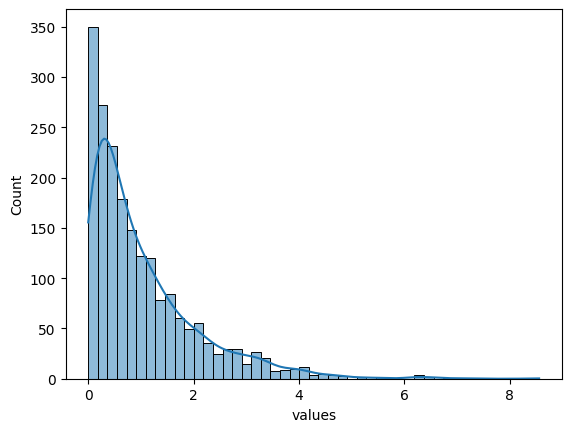

In [3]:
sns.histplot(df['values'], kde=True)

In [4]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [5]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,0.795875,0.468096,0.468096,0.111851
1,1.255931,0.599037,0.599037,0.540908
2,0.923223,0.509953,0.509953,0.237750
3,0.787201,0.465051,0.465051,0.104774
4,0.551048,0.370514,0.370514,-0.182289


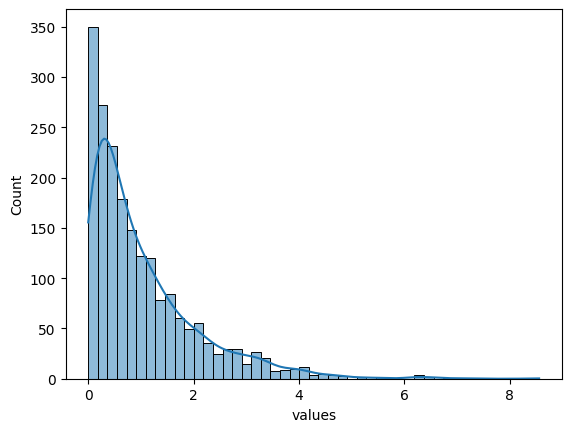

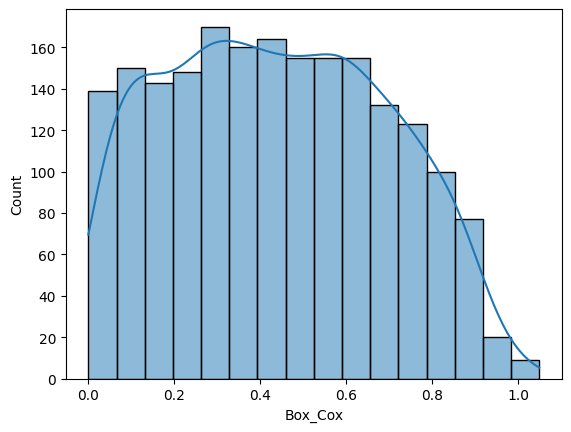

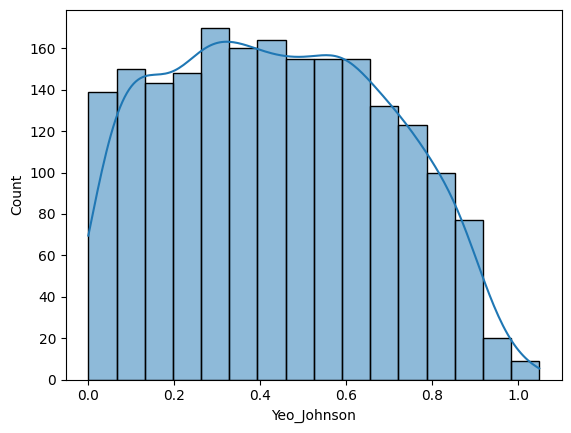

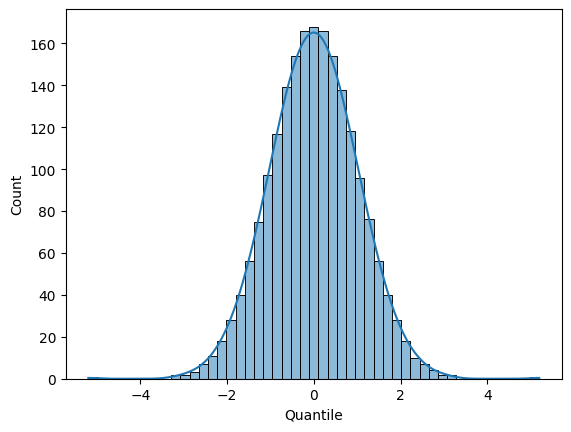

In [6]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

### L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data.
The L2 norm is calculated as the square root of the sum of the squared vector values.

In [1]:
from sklearn.preprocessing import Normalizer

# Updated data
data = [[2, 3, 4], [0, 5, 12], [7, 24, 0]]

# Create a normalizer with L2 norm
normalizer = Normalizer(norm='l2')

# Normalize the data and print the transformed output
print(normalizer.fit_transform(data))


[[0.37139068 0.55708601 0.74278135]
 [0.         0.38461538 0.92307692]
 [0.28       0.96       0.        ]]


In [2]:
from sklearn.preprocessing import Normalizer

# Updated data
data = [[2, 3, 4], [0, 5, 12], [7, 24, 0]]

# Create a normalizer with L1 norm
normalizer = Normalizer(norm='l1')

# Normalize the data and print the transformed output
print(normalizer.fit_transform(data))


[[0.22222222 0.33333333 0.44444444]
 [0.         0.29411765 0.70588235]
 [0.22580645 0.77419355 0.        ]]
